In [21]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from scipy.stats import uniform
from scipy.stats import gaussian_kde

In [22]:
def f(x):
    if x > math.pi/2 and x <= math.pi:
        return 4/math.pi - 4*x/math.pi**2
    elif x >= 0 and x <= math.pi/2:
        return 4*x/math.pi**2
    else:
        return 0

In [23]:
# MAIN CODE
iteration = 0
samples = np.zeros(shape=(1000, ))
x = 0 # define x

while iteration < 1000:
    # Step 1: Generate a uniform value u in (0,1)
    u = random.uniform(0, 1)
    u_adapted = u*2
    # Check in which interval it belongs
    if u*math.pi > math.pi/2 and u*math.pi <= math.pi:
        if u_adapted<1.5:
            continue
        else:
            x1 = (4*math.pi + math.sqrt(16*math.pi**2 - 8*u_adapted*math.pi**2))/4
            x2 = (4*math.pi - math.sqrt(16*math.pi**2 - 8*u_adapted*math.pi**2))/4
            # One of the x's should be rejected since F is '1-1' in [pi/2, pi]
            if x1 >= math.pi/2 and x1 <= math.pi:
                x = x1
            else:
                x = x2
            samples[iteration] = x
            iteration+=1
    elif u*math.pi >= 0 and u*math.pi <= math.pi/2:
        if u_adapted>1.5:
            continue
        else:
            x = math.sqrt(u_adapted/2)*math.pi
            samples[iteration] = x
            iteration+=1
    else:
        print("Incorrect Value")

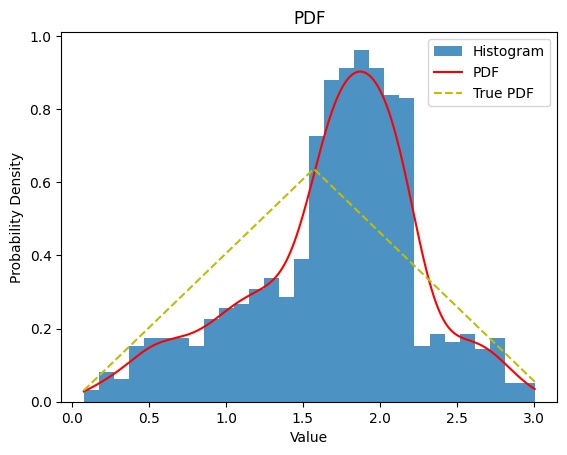

In [24]:
# Plot the histogram
plt.hist(samples, bins=30, density=True, alpha=0.8, label='Histogram')

# Estimate the PDF curve using KDE
kde = gaussian_kde(samples)
z = np.linspace(samples.min(), samples.max(), 1000)
estimated_pdf = kde(z)
plt.plot(z, estimated_pdf, 'r-', label='PDF')

# Plot the true PDF curve
real_pdf = [f(xi) for xi in z]
plt.plot(z, real_pdf, 'y--', label='True PDF')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('PDF')
plt.legend()

# Show the plot
plt.show()

In [25]:
def f_array(x):
    return np.array([f(xi) for xi in x])

# Compute the Kolmogorov-Smirnov test statistic and p-value
statistic, pvalue = kstest(samples, f_array)
print('K-S test statistic:', statistic)
print('p-value:', pvalue)

K-S test statistic: 0.9453833999702073
p-value: 0.0
